In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('bollywood-1.csv', index_col=False)

In [9]:
df.shape

(149, 10)

149 records

In [67]:
df.groupby("ReleaseTime").size().sort_values().reset_index(name='Movies Count')


,ReleaseTime,Movies Count
0,LW,15
1,FS,17
2,HS,18
3,N,99


In [113]:
c1= df.loc[(df['ReleaseTime']=="FS")].groupby("Genre").size().reset_index(name='Count')#.sort_values(ascending=False)
#c1.loc[0]
c1.max()

Genre    Thriller
Count           4
dtype: object

In [73]:
c1=df.groupby(["Genre", "ReleaseTime"]).size().reset_index(name='Movies Count')
c1.loc[1:]

,Genre,ReleaseTime,Movies Count
1,Drama,HS,6
2,Drama,LW,1
3,Drama,N,24
4,Action,FS,3
5,Action,HS,3
6,Action,LW,3
7,Action,N,12
8,Action,N,3
9,Comedy,FS,3
10,Comedy,HS,5


In [107]:
df['year'] = pd.DatetimeIndex(df['Release Date']).year 
c= df.groupby("year").size().sort_values().reset_index(name='Movies Count')
c.max()


year            2015
Movies Count      70
dtype: int64

In [139]:
import calendar
df['month'] = pd.DatetimeIndex(df['Release Date']).month 
c= df.loc[(df['Budget']>=30)].groupby("month").size().sort_values(ascending=False).reset_index(name='Count')
c['month'] = c['month'].apply(lambda x: calendar.month_abbr[x])
c.loc[0]


month    Feb
Count      8
Name: 0, dtype: object

In [152]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) /  df['Budget']
c= df[['MovieName','ROI']].sort_values(by=['ROI'])
c.iloc[0:10]

,MovieName,ROI
9,Gangoobai,-0.995000
15,Bandook,-0.977500
53,Sona Spa,-0.976000
3,Rajdhani Express,-0.950000
49,Kya Dilli Kya Lahore,-0.928571
121,Satya 2,-0.926667
67,Purani Jeans,-0.890000
103,Samrat and Co.,-0.888889
30,Heartless,-0.875000
102,Kaanchi,-0.870968


In [160]:
c = df.groupby("ReleaseTime")
c['ROI'].mean().sort_values(ascending=False).reset_index(name='AvgROI')

,ReleaseTime,AvgROI
0,LW,1.127205
1,FS,0.973853
2,HS,0.850867
3,N,0.657722


In [162]:
correlation = df["BoxOfficeCollection"]. corr(df["YoutubeLikes"])
correlation

0.6825165877731297

In [165]:
#print(df.corr())

<AxesSubplot:title={'center':'YoutubeViews'}, xlabel='Genre'>

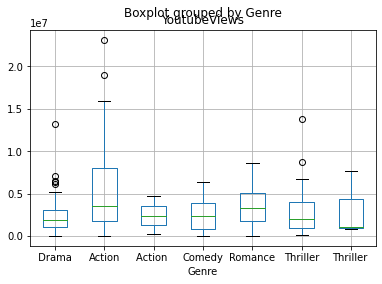

In [168]:
df.boxplot(by ='Genre', column =['YoutubeViews'], grid = True)

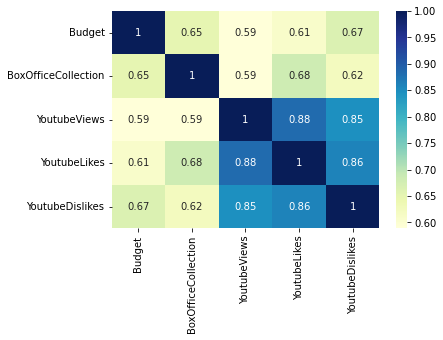

In [173]:
import seaborn as sb

# plotting correlation heatmap
dataplot = sb.heatmap(df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [177]:
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,year,month,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,2014,4,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,2013,1,0.200000
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,2014,7,-0.600000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,2013,1,-0.950000
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,2014,7,-0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2015,2,1.000000
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,2015,3,1.469231
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,2015,3,-0.625000
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,2015,3,1.378000


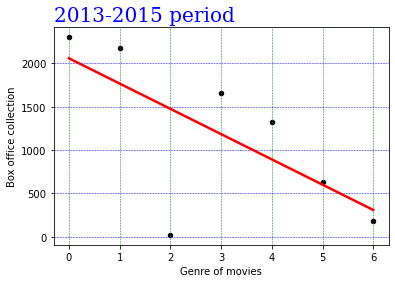

In [234]:
c = df[(df['year'] >= 2013) & (df['year'] <= 2015)].groupby("Genre")
d = c['BoxOfficeCollection'].sum().reset_index(name='BoxOfficeTotalCollection')
y=d['BoxOfficeTotalCollection']
x= d.index
plt.scatter(x, y, color = 'black' , s=20)

font1 = {'family':'serif','color':'blue','size':20}
plt.title("2013-2015 period", fontdict = font1,loc = 'left')
plt.xlabel("Genre of movies")
plt.ylabel("Box office collection")
plt.grid(axis = 'x',color = 'green', linestyle = '--', linewidth = 0.5)
plt.grid(axis = 'y',color = 'blue', linestyle = '--', linewidth = 0.5)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color = 'r',linewidth = '2.5')

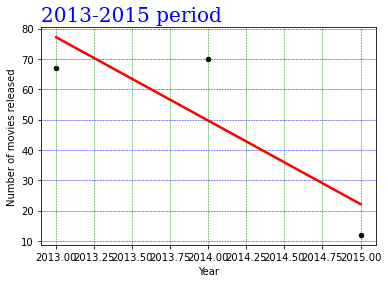

In [206]:
c = df[(df['year'] >= 2013) & (df['year'] <= 2015)].groupby("year")
d = c.size().reset_index(name="MoviesCount")

x=d['year']
y=d['MoviesCount']
plt.scatter(x, y, color = 'black' , s=20)

font1 = {'family':'serif','color':'blue','size':20}
plt.title("2013-2015 period", fontdict = font1,loc = 'left')
plt.xlabel("Year")
plt.ylabel("Number of movies released")
plt.grid(axis = 'x',color = 'green', linestyle = '--', linewidth = 0.5)
plt.grid(axis = 'y',color = 'blue', linestyle = '--', linewidth = 0.5)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color = 'r',linewidth = '2.5')


<BarContainer object of 7 artists>

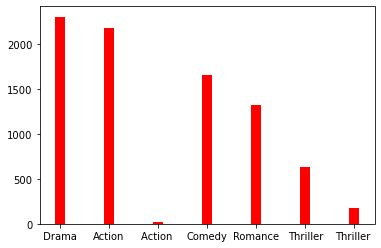

In [247]:
c = df.groupby("Genre")
d = c['BoxOfficeCollection'].sum().reset_index(name='BoxOfficeTotalCollection')
x = d["Genre"]
y = d["BoxOfficeTotalCollection"]
plt.bar(x,y,color = "red", width = 0.2)

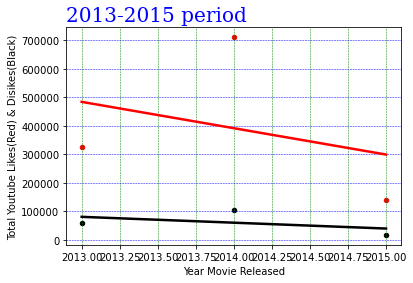

In [250]:
c = df[(df['year'] >= 2013) & (df['year'] <= 2015)].groupby("year")
d = c['YoutubeLikes'].sum().reset_index(name='TotalYoutubeLikes')
y=d['TotalYoutubeLikes']
x= d.year
plt.scatter(x, y, color = 'red' , s=20)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color = 'r',linewidth = '2.5')


d = c['YoutubeDislikes'].sum().reset_index(name='TotalYoutubeDisLikes')
z=d['TotalYoutubeDisLikes']
plt.scatter(x, z, color = 'black' , s=20)
m, b = np.polyfit(x, z, 1)
plt.plot(x, m*x + b,color = 'black',linewidth = '2.5')

font1 = {'family':'serif','color':'blue','size':20}
plt.title("2013-2015 period", fontdict = font1,loc = 'left')
plt.xlabel("Year Movie Released")
plt.ylabel("Total Youtube Likes(Red) & Disikes(Black)")
plt.grid(axis = 'x',color = 'green', linestyle = '--', linewidth = 0.5)
plt.grid(axis = 'y',color = 'blue', linestyle = '--', linewidth = 0.5)
